In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import pandas as pd

df = pd.read_csv("FPA-FOD_39attributes.csv", low_memory = False)

In [3]:
unknown_mask = df['NWCG_GENERAL_CAUSE'] == "Missing data/not specified/undetermined"

df_known = df[~unknown_mask].copy()
df_unknown = df[unknown_mask].copy()

In [4]:
X = df_known.drop(columns=['NWCG_GENERAL_CAUSE', "Unnamed: 0"])
y = df_known['NWCG_GENERAL_CAUSE']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
le2 = LabelEncoder()
X['STATE'] = le2.fit_transform(X['STATE'])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y
)


le3 = LabelEncoder()
X_train["Mang_Name"] = le3.fit_transform(X_train["Mang_Name"])
X_test["Mang_Name"] = le3.transform(X_test["Mang_Name"])


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=13,
    eval_metric='mlogloss',
    tree_method="hist"     
)

param_grid = {
    "learning_rate": [0.05, 0.1],
    "max_depth": [6, 8],
    "n_estimators": [200, 300],
    "subsample": [0.8],
    "colsample_bytree": [0.7, 0.8]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_log_loss",     
    cv=3,                        
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best params:", grid.best_params_)
print("Best log loss:", -grid.best_score_)

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softprob',
    num_class=12,         
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=12,
    n_estimators=350,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

class_names = le.inverse_transform(best_model.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion-xgboost.png", dpi=400)
plt.show()

NameError: name 'best_model' is not defined

Accuracy: 0.7184

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       191
           1       0.55      0.64      0.59       217
           2       0.19      0.04      0.07        70
           3       0.00      0.00      0.00         3
           4       0.56      0.31      0.40        16
           5       0.00      0.00      0.00         9
           6       0.83      0.95      0.89       789
           7       0.00      0.00      0.00         6
           8       0.40      0.06      0.11        31
           9       1.00      0.20      0.33        10
          10       0.55      0.45      0.50       175
          11       0.00      0.00      0.00        17

    accuracy                           0.72      1534
   macro avg       0.39      0.27      0.29      1534
weighted avg       0.67      0.72      0.68      1534



/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

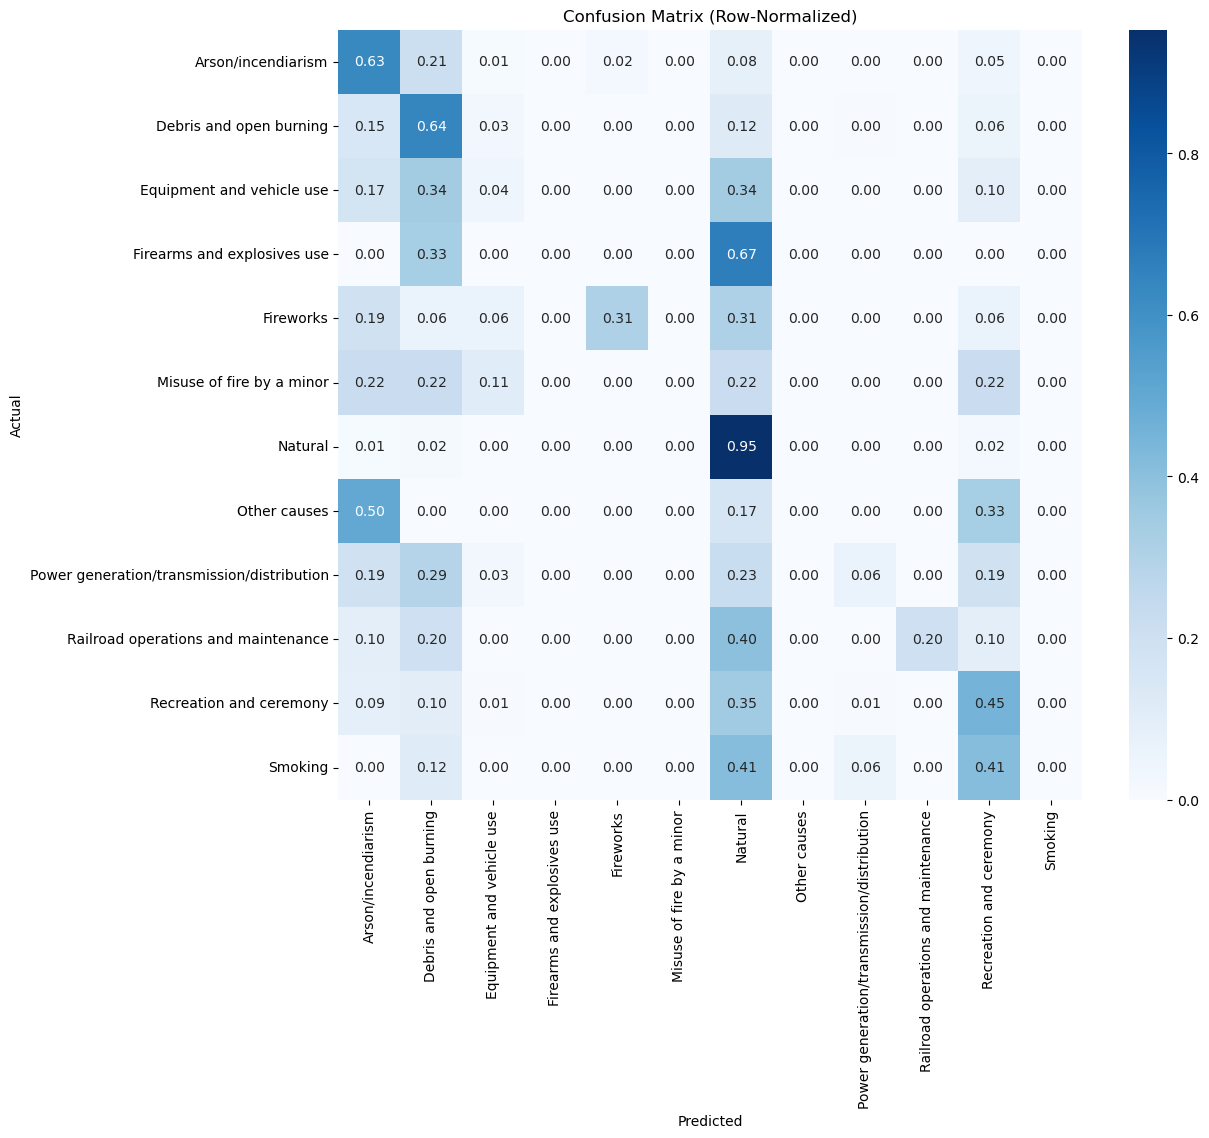

Accuracy:  0.7184
Precision: 0.6711
Recall:    0.7184
F1 Score:  0.6848
Cohen’s Kappa: 0.5635
Matthews Corr Coef: 0.5686


/srv/conda/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, classification_report
)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

class_names = le.inverse_transform(model.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Row-Normalized)")
plt.savefig("confusion-xgboost-normalized.png", dpi=400)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Cohen’s Kappa: {kappa:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

In [10]:
!pip install shap

  Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (1.1 MB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [shap]1/2 [shap]


In [11]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(model)

X_sample = X_train.sample(300, random_state=42)


shap_values = explainer.shap_values(X_sample)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

sv = shap_values

if isinstance(sv, np.ndarray) and sv.ndim == 3:
    for class_idx in range(sv.shape[2]):
        shap.summary_plot(
            sv[:, :, class_idx],  
            X_sample,
            plot_type="dot",
            max_display=10,
            show=False
        )
        plt.savefig(f"shap{class_idx}.png", dpi=300, bbox_inches="tight")
        plt.close()

In [48]:
import numpy as np

natural_idx = 6
y_binary_true = (y_test == natural_idx).astype(int)  # 1=Natural, 0=Human
y_binary_pred = (y_pred == natural_idx).astype(int)

# Binary CM: [[TN, FP], [FN, TP]]
cm_binary = confusion_matrix(y_binary_true, y_binary_pred)

# Metrics//
binary_accuracy = accuracy_score(y_binary_true, y_binary_pred)
precision_natural = precision_score(y_binary_true, y_binary_pred)
recall_natural = recall_score(y_binary_true, y_binary_pred) 
f1_natural = f1_score(y_binary_true, y_binary_pred)

print("Binary CM (Human vs Natural):\n", cm_binary)
print(f"Binary Accuracy: {binary_accuracy:.1%}")
print(f"Natural Precision: {precision_natural:.1%}")
print(f"Natural Recall: {recall_natural:.1%}")
print(f"Natural F1: {f1_natural:.1%}")

Binary CM (Human vs Natural):
 [[581 164]
 [ 38 751]]
Binary Accuracy: 86.8%
Natural Precision: 82.1%
Natural Recall: 95.2%
Natural F1: 88.1%
